# Carbonate control functions

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import skfuzzy as fuzz

from scripts import carbRules as carbFct

# display plots in SVG format
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Depth control

## Carbonate 1 control

Define depth range:

In [4]:
depth = np.linspace(-10.0, 40.0, num=101, endpoint=True)

In [5]:
# Parameters
shallow_depth_sigma = 0.1
shallow2 = fuzz.gaussmf(depth, 0.5, shallow_depth_sigma)
shallow_depth_sigma = 3
shallow = fuzz.gaussmf(depth, 5, shallow_depth_sigma)
id1 = np.where(depth<0.5)[0]
id2 = np.where(depth>5)[0]

shallow[id1[-1]:id2[0]] = 1.
shallow[:id1[-1]] = shallow2[:id1[-1]]
id = np.where(depth<=0)[0]
shallow[id] = 0
shallow[shallow<0.00001] = 0.

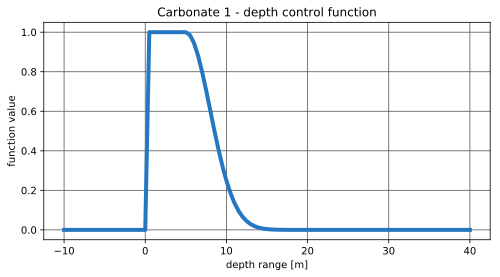

In [6]:
carbFct.plot_depth_control(depth,shallow,'Carbonate 1 - depth control function', xlabel='depth range [m]', 
                   color='#2577c4', size=(8,4)) #,fname='data/depthcontrol1')

## Carbonate 2 control

In [7]:
# Parameters
shallow_depth_sigma = 2
shallow2 = fuzz.gaussmf(depth, 9, shallow_depth_sigma)
shallow_depth_sigma = 4
shallow = fuzz.gaussmf(depth, 12, shallow_depth_sigma)
id1 = np.where(depth<9)[0]
id2 = np.where(depth>12)[0]
shallow[id1[-1]:id2[0]] = 1.
shallow[:id1[-1]] = shallow2[:id1[-1]]
id = np.where(depth<=0)[0]
shallow[id] = 0
shallow[shallow<0.00001] = 0.

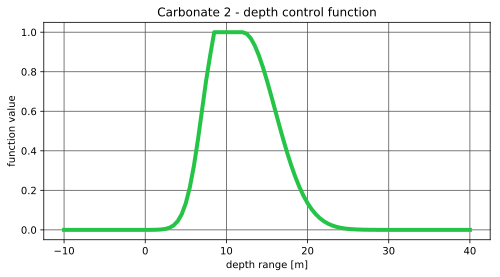

In [8]:
carbFct.plot_depth_control(depth,shallow,'Carbonate 2 - depth control function', xlabel='depth range [m]', 
                   color='#25c447', size=(8,4)) #,fname='data/depthcontrol2')

## Pelagic control

In [9]:
depth = np.linspace(0.0, 200.0, num=101, endpoint=True)

In [11]:
# Parameters
pelagic_depth_sigma = 10
pelagic = 1.-fuzz.gaussmf(depth, 90, pelagic_depth_sigma)
id = np.where(depth<90)[0]
pelagic[id] = 0

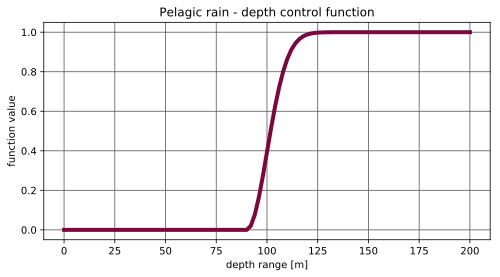

In [12]:
carbFct.plot_depth_control(depth,pelagic,'Pelagic rain - depth control function', xlabel='depth range [m]', 
                   color='#7a083f', size=(8,4)) #,fname='data/pelagiccontrol')

# Wave height control

## Carbonate 1 control

In [13]:
wave_height = np.linspace(0.0, 5.0, num=101, endpoint=True)

In [14]:
# Parameters
wave_sigma = 0.19
wave2 = fuzz.gaussmf(wave_height, 1.2, wave_sigma)
wave_sigma2 = 0.25
wave3 = fuzz.gaussmf(wave_height, 0.6, wave_sigma2)
id1 = np.where(wave_height<0.6)[0]
id2 = np.where(wave_height>1.2)[0]
wave2[id1[-1]:id2[0]] = 1.
wave2[:id1[-1]] = wave3[:id1[-1]]
wave2[wave2<0.01] = 0.

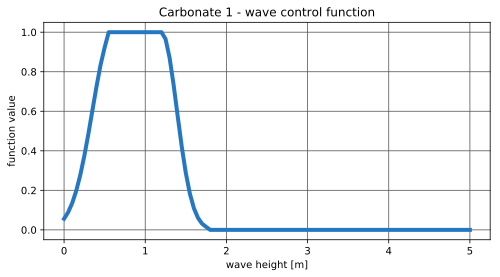

In [15]:
carbFct.plot_depth_control(wave_height,wave2,'Carbonate 1 - wave control function', xlabel='wave height [m]', 
                   color='#2577c4', size=(8,4)) #,fname='data/wavecontrolcarb1')

## Carbonate 2 control

In [17]:
# Parameters
wave_sigma = 0.3
wave2 = fuzz.gaussmf(wave_height, 1.5, wave_sigma)
wave_sigma2 = 0.15
wave3 = fuzz.gaussmf(wave_height, 0.45, wave_sigma2)
id1 = np.where(wave_height<0.45)[0]
id2 = np.where(wave_height>1.5)[0]
wave2[id1[-1]:id2[0]] = 1.
wave2[:id1[-1]] = wave3[:id1[-1]]
wave2[wave2<0.001] = 0.

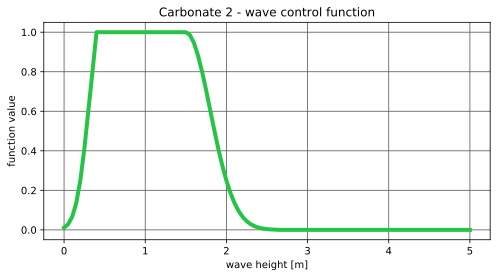

In [18]:
# Write membership function
nameCSV = 'wavecontrolcarb2'
carbFct.plot_depth_control(wave_height,wave2,'Carbonate 2 - wave control function', xlabel='wave height [m]', 
                   color='#25c447', size=(8,4)) #,fname='data/wavecontrolcarb2')

# Sedimentation control

## Carbonate 1 control

In [19]:
sed = np.linspace(0.0, 0.01, num=101, endpoint=True)

In [20]:
# Parameters
sed_sigma = 0.0006
sedmed = fuzz.gaussmf(sed, 0.0005, sed_sigma)
sed_sigma2 = 0.004
tmp_sed = fuzz.gaussmf(sed, 0.01, sed_sigma2)
id1 = np.where(sed<0.01)[0]
id2 = np.where(sed>0.0005)[0]
sedmed[:id2[0]] = 1.
sedmed[sedmed<0.0001] = 0.

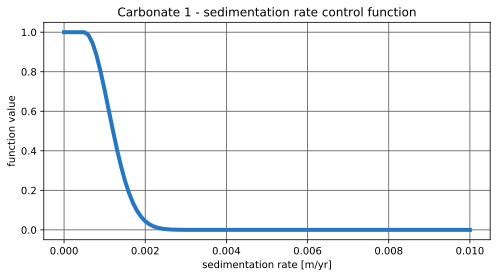

In [21]:
carbFct.plot_depth_control(sed,sedmed,'Carbonate 1 - sedimentation rate control function', xlabel='sedimentation rate [m/yr]', 
                   color='#2577c4', size=(8,4)) #,fname='data/sedcontrolcarb1')

## Carbonate 2 control

In [22]:
# Parameters
sed_sigma = 0.0008
sedmed = fuzz.gaussmf(sed, 0.0007, sed_sigma)
sed_sigma2 = 0.004
tmp_sed = fuzz.gaussmf(sed, 0.01, sed_sigma2)
id1 = np.where(sed<0.01)[0]
id2 = np.where(sed>0.0007)[0]
sedmed[:id2[0]] = 1.
sedmed[sedmed<0.0001] = 0.

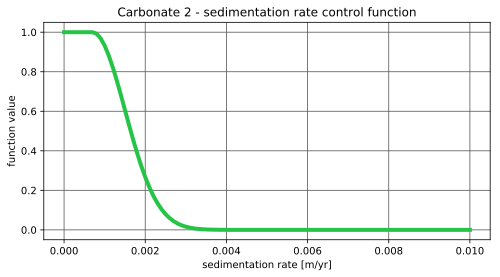

In [23]:
carbFct.plot_depth_control(sed,sedmed,'Carbonate 2 - sedimentation rate control function', xlabel='sedimentation rate [m/yr]', 
                   color='#25c447', size=(8,4)) #,fname='data/sedcontrolcarb2')